In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from IPython.display import Image, display
import nibabel

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


# Intra-regional homogeneity

In [2]:
ltc_nonparc = matrices.MicrostructuralCovarianceMatrix('thickness', None)
ltc_nonparc._load()

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-None_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


In [40]:
brodmann = datasets.load_parcellation_map('brodmann', True, downsampled=True)
brodmann_surf = surfaces.CatCorticalSurface(brodmann[:, np.newaxis], ['parcel'], 'brodmann')
brodmann_surf.parcellated_data = pd.DataFrame(brodmann[:, np.newaxis]).astype('category')
brodmann_surf.parcellated_data.columns = brodmann_surf.columns
brodmann_surf.short_label = 'Brodmann'
# remove adysgranular
valid_parcels = matrices.MicrostructuralCovarianceMatrix('thickness', 'brodmann').matrix.index
invalid_parcels = brodmann_surf.parcellated_data.iloc[:, 0].cat.categories.difference(valid_parcels)
brodmann_surf.parcellated_data.iloc[:, 0] = brodmann_surf.parcellated_data.iloc[:, 0].cat.remove_categories(invalid_parcels).dropna()

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-brodmann_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


(17386, 1)
Calculating p-value with permutation testing (1 permutations)
Perm 0


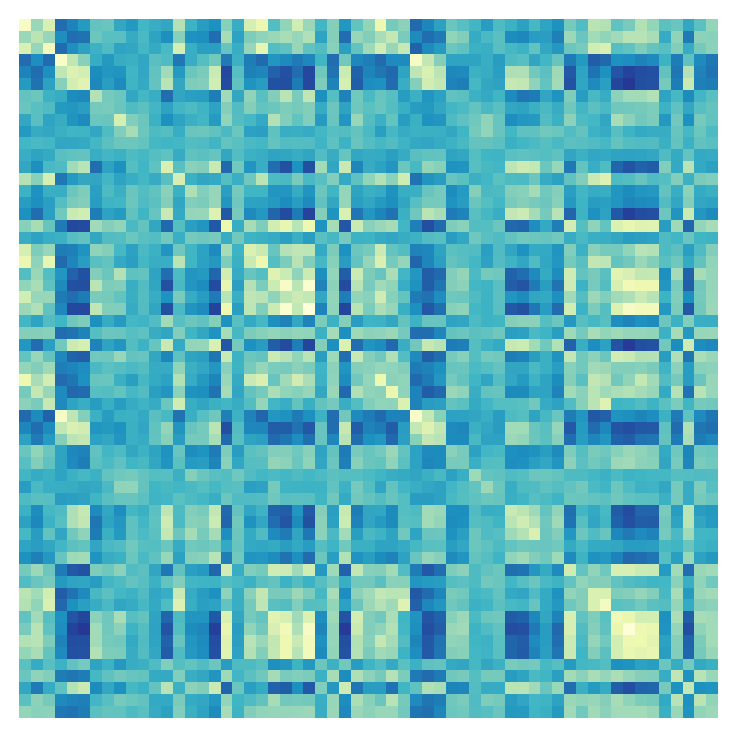

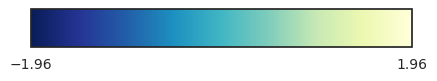

In [41]:
intra_inter = ltc_nonparc.associate_categorical_surface(brodmann_surf, stats=True, n_perm=1, null_method='shuffle')

In [20]:
intra_inter['diff'] = intra_inter['intra'] - intra_inter['inter']

,intra,inter,pvals,diff
L_BA23,0.156310,-0.016592,0.0,0.172902
L_BA22,0.263876,0.085254,0.0,0.178622
R_BA22,0.301146,0.119083,0.0,0.182063
R_BA37,0.319343,0.012985,0.0,0.306358
L_BA40,0.371719,0.035792,0.0,0.335927
R_BA5,0.349217,0.004780,0.0,0.344436
L_BA2,0.450968,0.105248,0.0,0.345720
R_BA2,0.438857,0.072480,0.0,0.366377
L_BA9,0.563702,0.179726,0.0,0.383976
L_BA5,0.464979,0.006809,0.0,0.458169


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


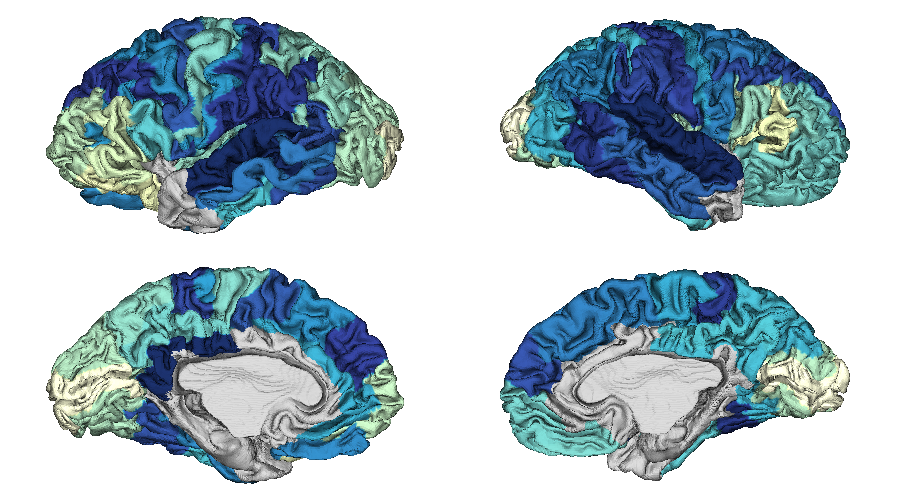

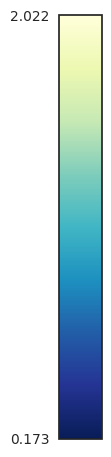

In [42]:
helpers.plot_surface(
    helpers.deparcellate(intra_inter['intra'] - intra_inter['inter'], 'brodmann'),
    inflate=False, plot_downsampled=False, cbar=True, cmap='YlGnBu_r', layout_style='grid'
)

## Method Box

In [16]:
brodmann_parc = brodmann_surf.parcellated_data.loc[ltc_nonparc.matrix.index]

ba17_mask = brodmann_parc == 'L_BA17'

ltc_intra_ba17 = ltc_nonparc.matrix.loc[ba17_mask.values, ba17_mask.values]
ltc_inter_ba17 = ltc_nonparc.matrix.loc[ba17_mask.values, ~ba17_mask.values]

(0.0, 4016.0, 423.0, 0.0)

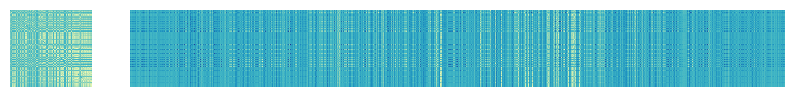

In [38]:
ltc_intra_inter_ba17 = np.concatenate([
    ltc_intra_ba17,
    np.zeros((ltc_intra_ba17.shape[0], 200))*np.NaN,
    ltc_inter_ba17.values[:, ::5]
], axis=1)

fig, ax = plt.subplots(figsize=(10,1))
ax = sns.heatmap(ltc_intra_inter_ba17, cmap='YlGnBu_r', cbar=False)
ax.axis('off')